In [3]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
# import scipy.signal


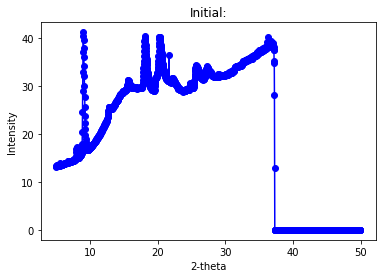

Processed 1751 lines.


In [4]:
'''Open the csv file and plot the first and last frames of the data (columns 1 and 30). The columnnumbers will need to be adjusted
if the data file of interest is not 30 frames.'''
with open('B1_MAPbI2Br_Dark60min.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    x=[]
    y=[]
    z=[]
    for row in csv_reader:
        if line_count == 0:
#             print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            x.append(float(row[0]))
            y.append(float(row[1]))
            z.append(float(row[23]))
            line_count += 1
    plt.plot(x,y, marker='o', color='blue')
    plt.title('Initial:')
    plt.xlabel('2-theta')
    plt.ylabel('Intensity')
    plt.show()
    print(f'Processed {line_count} lines.')

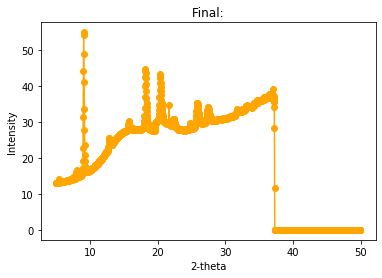

In [13]:
plt.plot(x,z, marker='o',color='orange')
plt.title('Final:')
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.show()
#print(f'Processed {line_count} lines.')

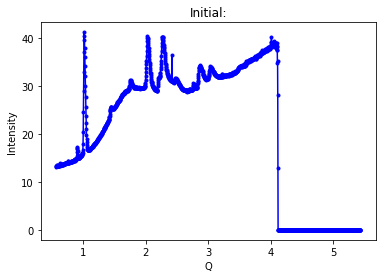

In [14]:
'''Converting the 2-theta data into a lattice spacing in Angstroms and converting angstoms to Q'''

import math
result=[(((((9.763E-11)/(2*math.sin(math.radians(row/2)))*1e10)**-1)*2)*math.pi) for row in x]
plt.plot(result,y, marker='.',color='blue')
plt.title('Initial:')
plt.xlabel('Q')
plt.ylabel('Intensity')
plt.show()


In [15]:
'''Calculating the maximum intensity and figuring out where that maximum value is in terms of '''
maxValue=np.max(y)
# print(maxValue)
index=y.index(maxValue)
lspace=(((result[index]/2)/math.pi)**-1)
lspace2=(x[index])
print('lattice spacing=', lspace, 'Angstroms')
print(lspace2)

lattice spacing= 6.196292384308952 Angstroms
9.037


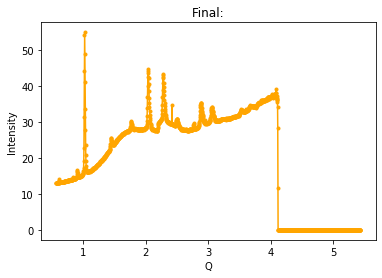

In [16]:
'''Converting the 2-theta data into a lattice spacing in Angstroms and converting angstoms to Q'''

import math
result=[(((((9.763E-11)/(2*math.sin(math.radians(row/2)))*1e10)**-1)*2)*math.pi) for row in x]
plt.plot(result,z, marker='.',color='orange')
plt.title('Final:')
plt.xlabel('Q')
plt.ylabel('Intensity')
plt.show()

        

RuntimeError: matplotlib does not support generators as input

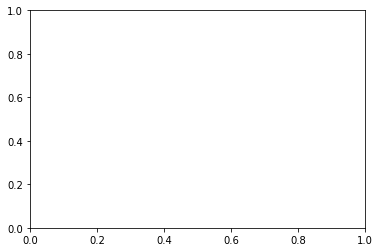

In [17]:
# import scipy; print(scipy.__version__)
# from scipy.signal import find_peaks
# peaks, _= find_peaks(y,threshold=0.6)
# plt.plot(result, y, lw=0.4, alpha=0.4 )
# # print(peaks[3])

# newY=[]
# newX=[]
# for i in peaks:
#     newX.append(result[i])
#     newY.append(y[i])
# print('Lattice Spacing=', newX, 'in Angstroms')
# print('Intensity=', newY)

# plt.plot(newX,newY, marker="o", ls="", ms=3 )

# plt.show()

'''2 theta calculations for peaks'''
'''------------------------------'''

# import scipy; print(scipy.__version__)
from scipy.signal import find_peaks
peaks, _= find_peaks(y, threshold=0.6)
"result=[]"
result=((((result([index])/2)/math.pi)**-1) for row in x)
plt.plot(result, y, lw=0.4, alpha=0.4)
# print(peaks[3])

newY=[]
newX=[]
for i in peaks:
    newX.append(result[i])
    newY.append(y[i])
print('Lattice Spacing=', newX, 'in Angstroms')
print('Intensity=', newY)

plt.plot(newX,newY, marker="o", ls="", ms=3 )

plt.show()

In [18]:
def nums(howMany):
    indices=[]
    millInd=[]
    for l in range(howMany):
        for k in range(howMany):
            for h in range(1,howMany):
                indices.append([h,k,l])
                millInd.append(math.sqrt((h**2)+(l**2)+(k**2)))
    return(indices,millInd)

def filterPeaks(newX):
    validPeaks=[]
    for i in newX:
        counter=0
        for q in nums(4)[1]:
            if abs(q-(lspace/i)) <.05:
                #abs(lspace2-(i/q)) < .05:
                validPeaks.append([i,q,abs(q-(lspace/i)),nums(4)[0][counter]])
                counter+=1
            else:
                counter+=1
    return(validPeaks)
                 
            
    

In [19]:

# print(nums(4)[0][10])
# print(nums(4)[1])
#[i for i in results if i not in validpeaks]
result= filterPeaks(newX)
print(result)
#[i for i in results if i not in validpeaks]

NameError: name 'newX' is not defined

In [20]:
>>> A = [6, 7, 8, 9, 10, 11, 12]
>>> subset_of_A = set([6, 9, 12])
>>> [i for i in A if i not in subset_of_A]
[7, 8, 10, 11]

[7, 8, 10, 11]

In [21]:
# def getRidofDups(peaks):
#     newList=[]
#     counter=0
#     for i in result:
#         if newList==[] or i[1] not in newList[counter]:
#             newList.append(i)
#             counter+=1
#         else: 
#             counter+=1
#     return newList

In [176]:
# getRidofDups(result)

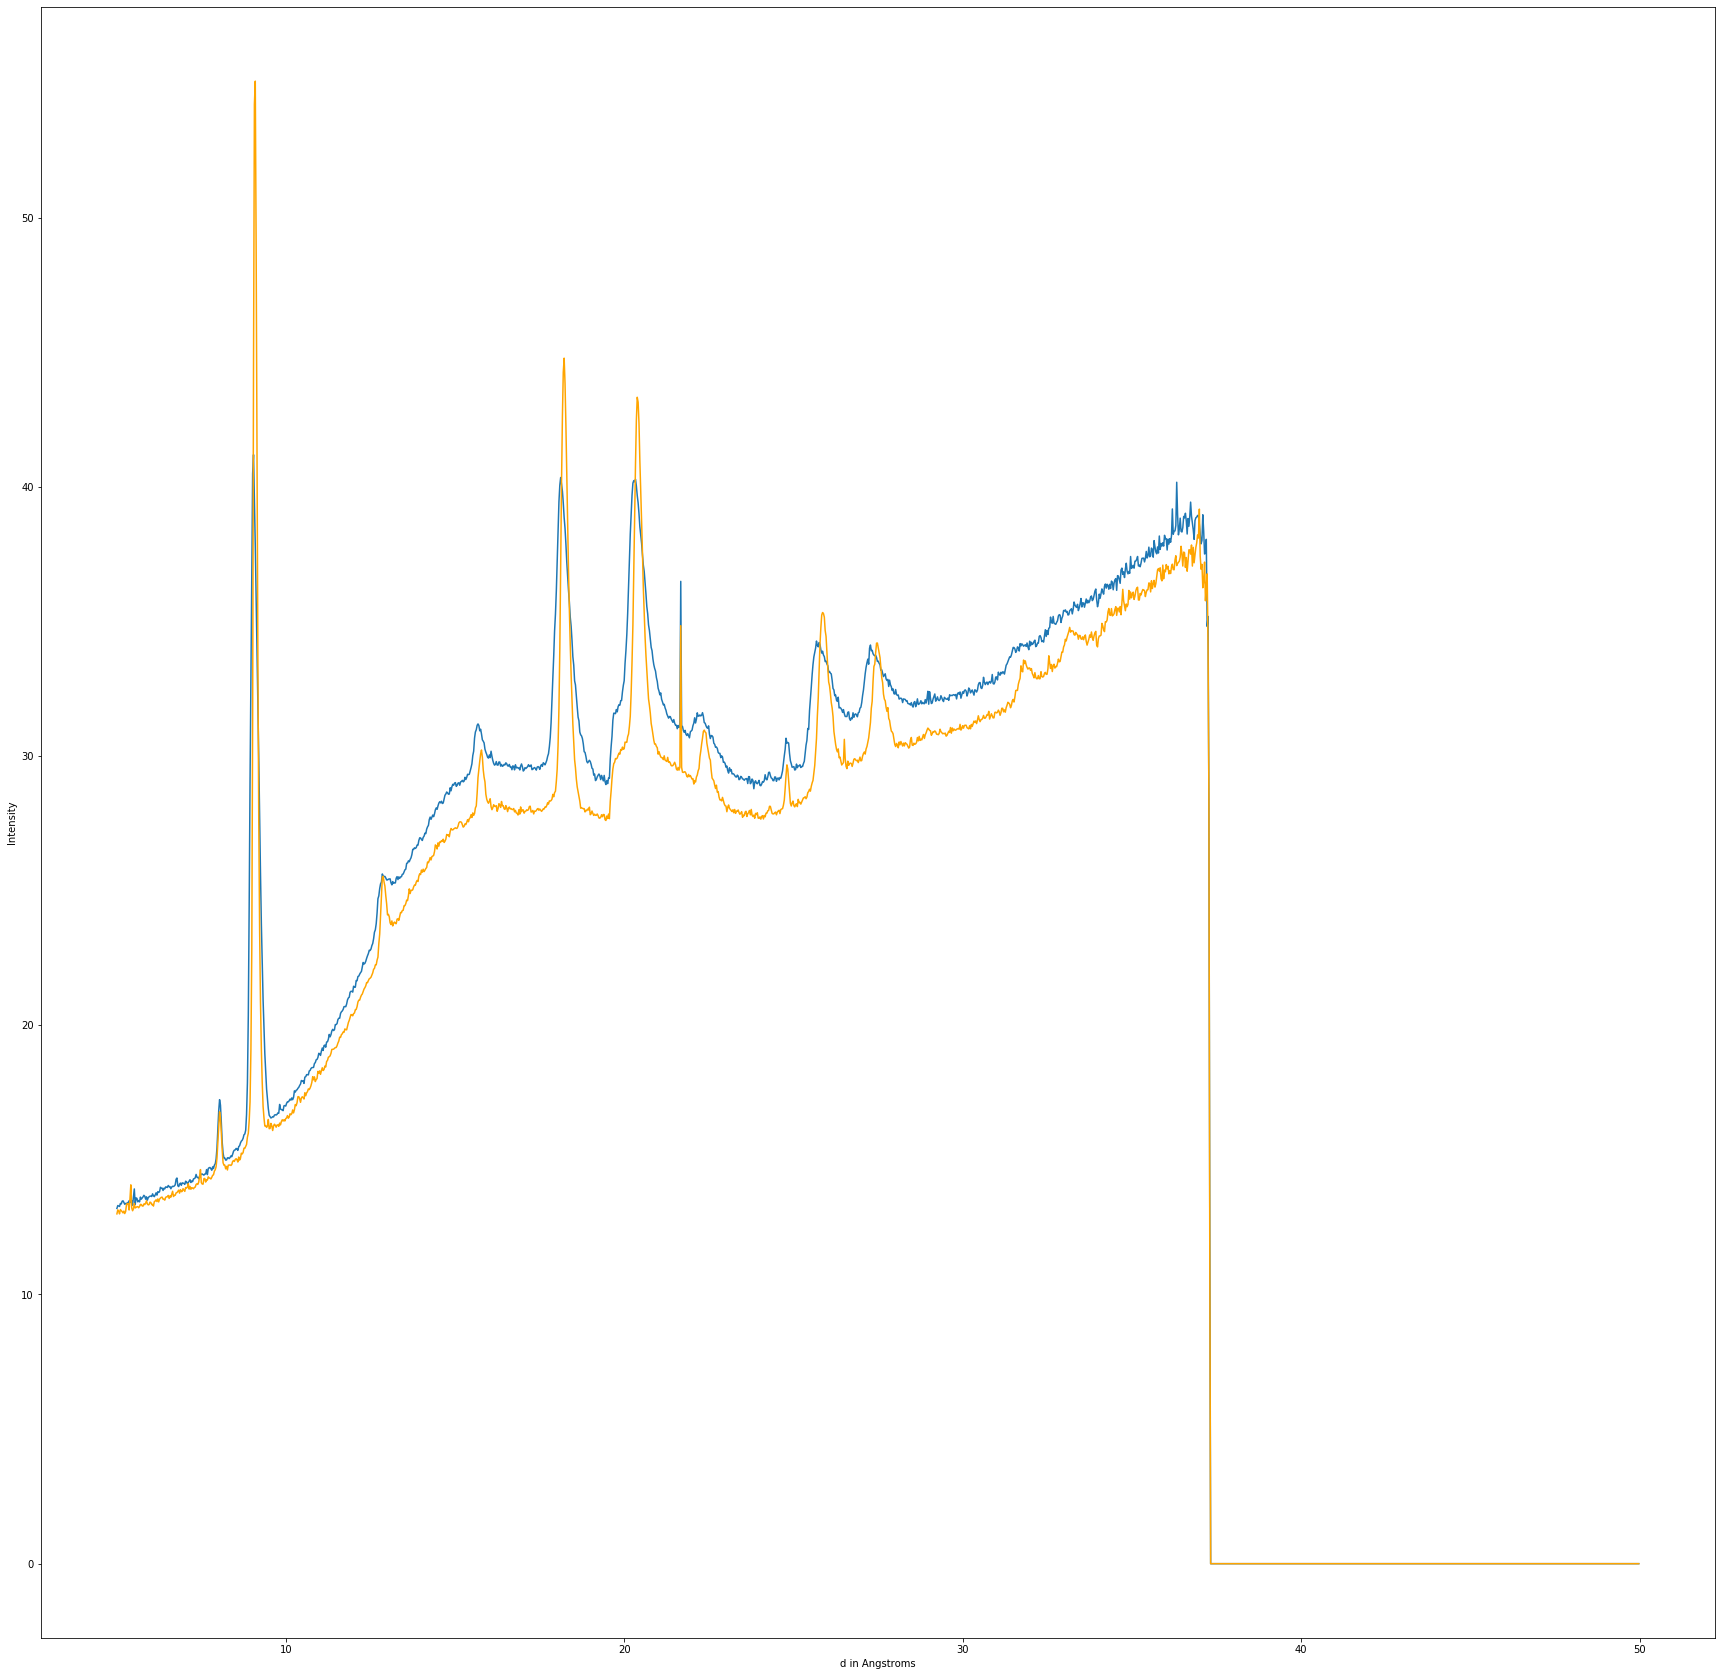

In [177]:
plt.plot(x,y)
plt.plot(x,z,color='orange')
plt.xlabel('d in Angstroms')
plt.ylabel('Intensity')
plt.rcParams["figure.figsize"] = (30,30)

In [178]:
with open('data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    noheaders=[]
    for row in csv_reader:
        if line_count == 0:
#             print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            noheaders.append(row)
    print(noheaders)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [179]:
# array=range(30)
# maxvals=[]
# print(noheaders[:0])
# for row in range(30):
#     maxim = np.max(noheaders[:row])
#     maxvals.append(maxim)

# new=[]
# for n in noheaders:
#     if n != '':
#         new.append(n)
yoyo = np.array(noheaders)
yoyo = yoyo[:,0:-2]
# print(yoyo)

newNH =[]
for i in yoyo:
    subList=[]
    for n in i:
        subList.append(float(n))
    newNH.append(subList)
# print(newNH)
bitch=np.array(newNH)
print(bitch)
maxes=bitch.max(0)
print(maxes)

NameError: name 'noheaders' is not defined

In [180]:
lame=[]
dumb=[]
for i in maxes:
    for k in newNH:
        if i in k:
            a=k.index(i)
            b=newNH
            lame.append([a,i])
            dumb.append([a,b])
        else:
            pass

NameError: name 'maxes' is not defined

In [41]:
print(lame)
# print(dumb)

[]


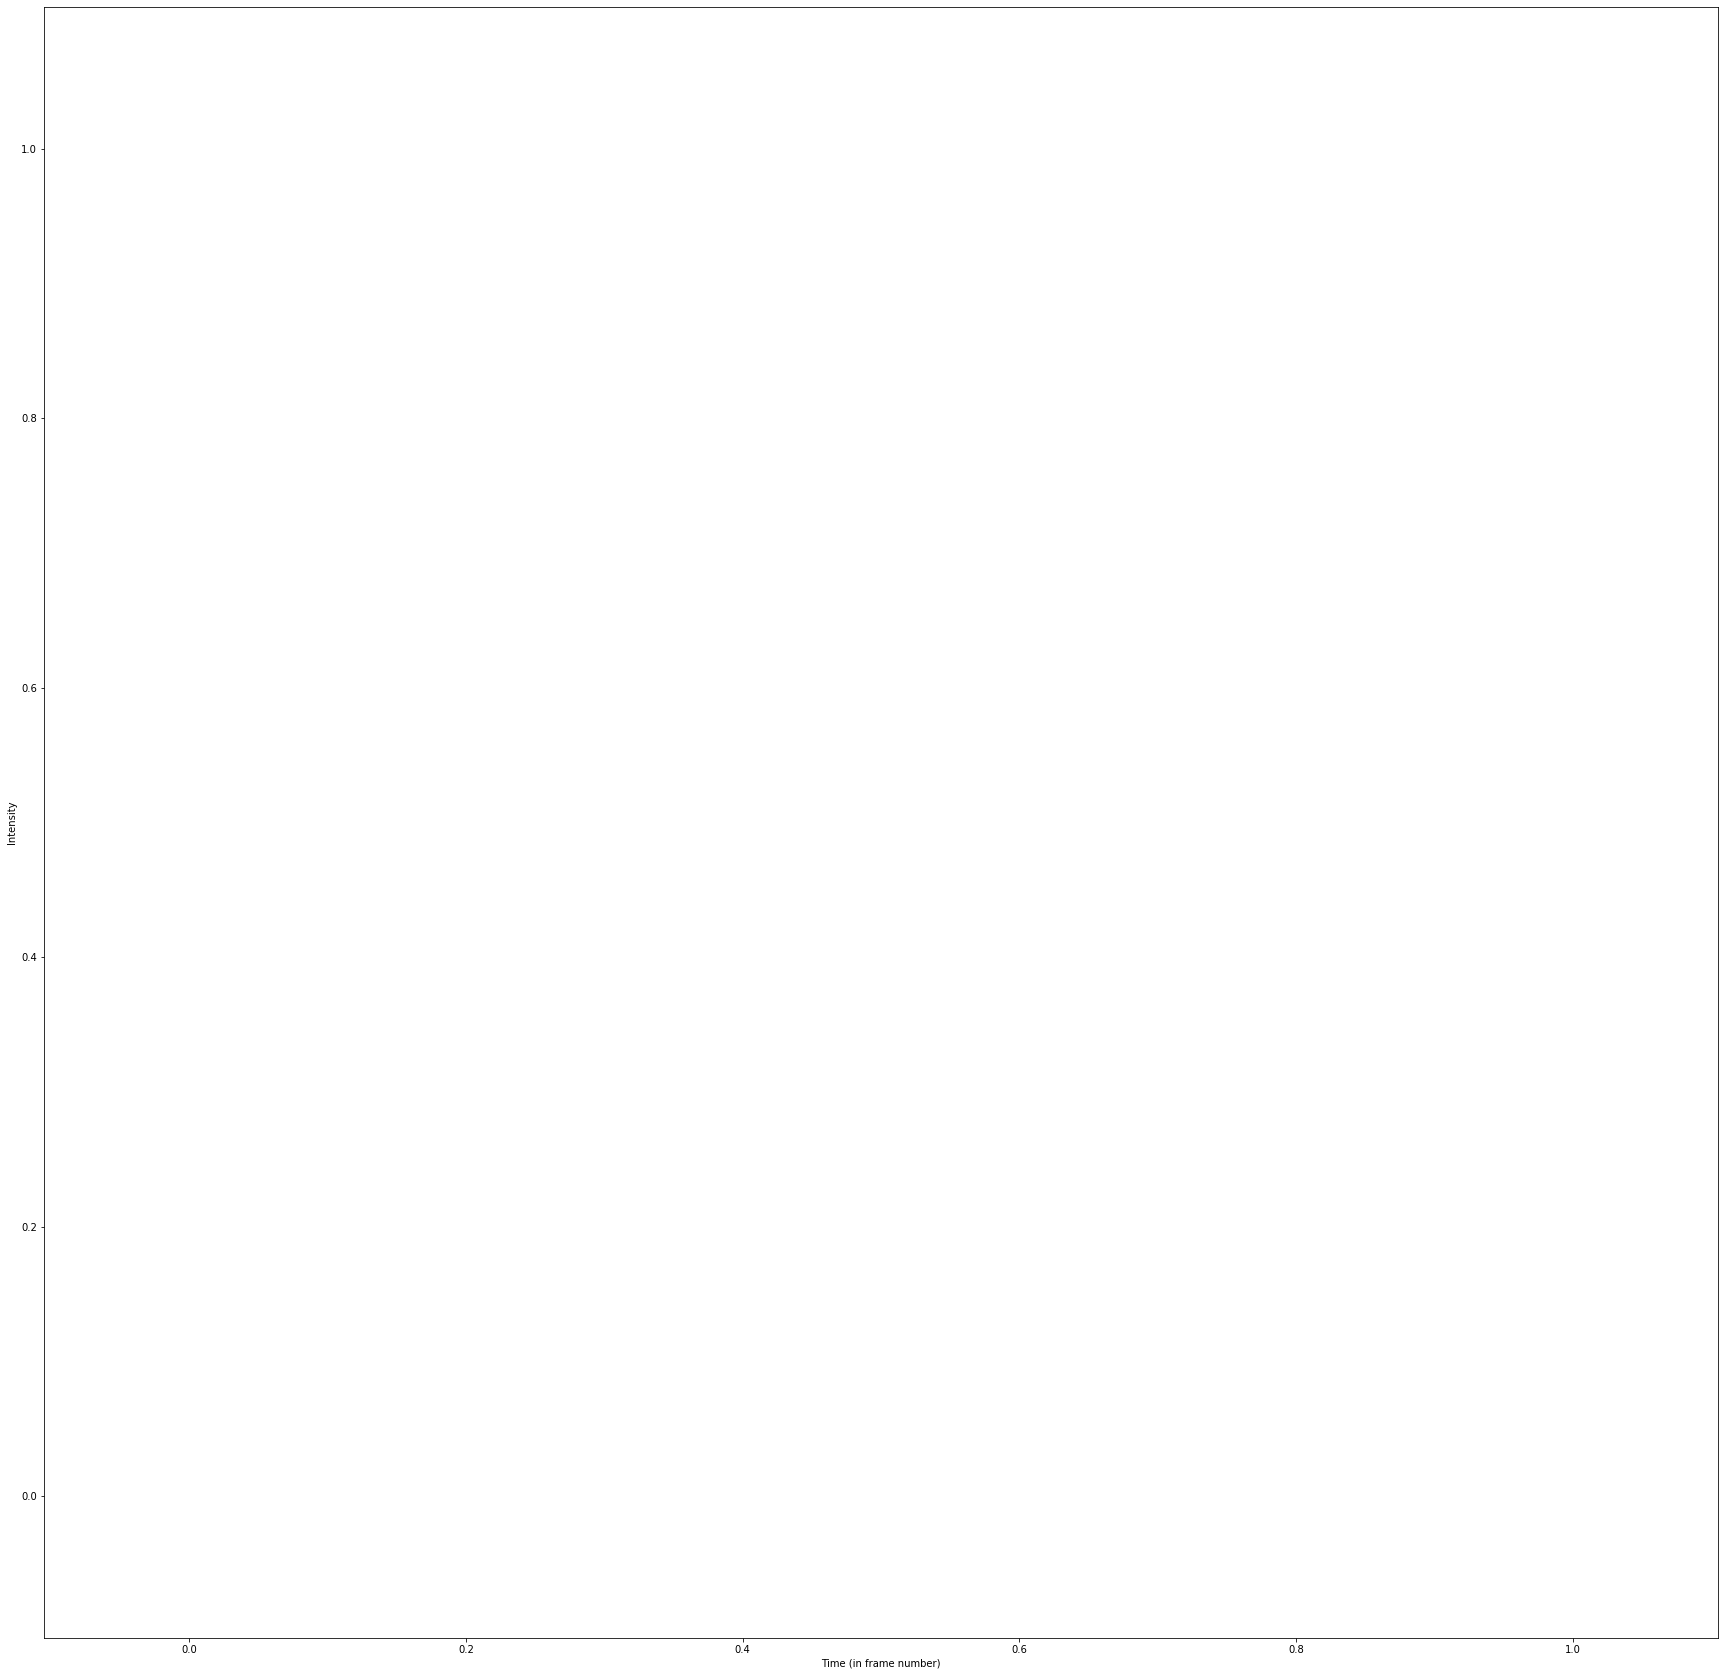

In [42]:
x=[]
y=[]
counter=0
for i in lame:
    if counter !=0:
        x.append(i[0])
        y.append(i[1])
    else:
        counter+=1

a=[]
b=[]
counter=0
for i in dumb:
    if counter !=0:
        a.append(i[0])
        b.append(i[1])
    else:
        counter+=1
        
plt.plot(x,y,marker='o')
plt.plot(a,b,color='orange')
plt.xlabel('Time (in frame number)')
plt.ylabel('Intensity')
plt.savefig('IntensityvsFrame.png')